# Predicción de Ventas

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales_dataset.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Aunque por el análisis exploratorio de los datos, sabemos que la TV es la mayor influyente en las ventas. De igual forma se utilizaran las demas columnas con el fin de saber las predicciones al momento de invertir en publicidad en los tres medios de comunicacion.

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
df[['TV','Radio','Newspaper']] = scaler.fit_transform(df[['TV','Radio','Newspaper']])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
SEED = 42

In [14]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=SEED)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

1.2310754565160396
2.4157289455935076


## Supuestos de regresión

In [20]:
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : y_pred,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
65,11.0,8.824816,2.175184
114,12.2,13.770555,-1.570555
16,24.4,24.224817,0.175183
141,10.4,11.100565,-0.700565
156,7.3,9.320092,-2.020092


In [22]:
residuals.shape

(40, 3)

#### La relación entre las variables independientes con la variables dependiente es lineal? 

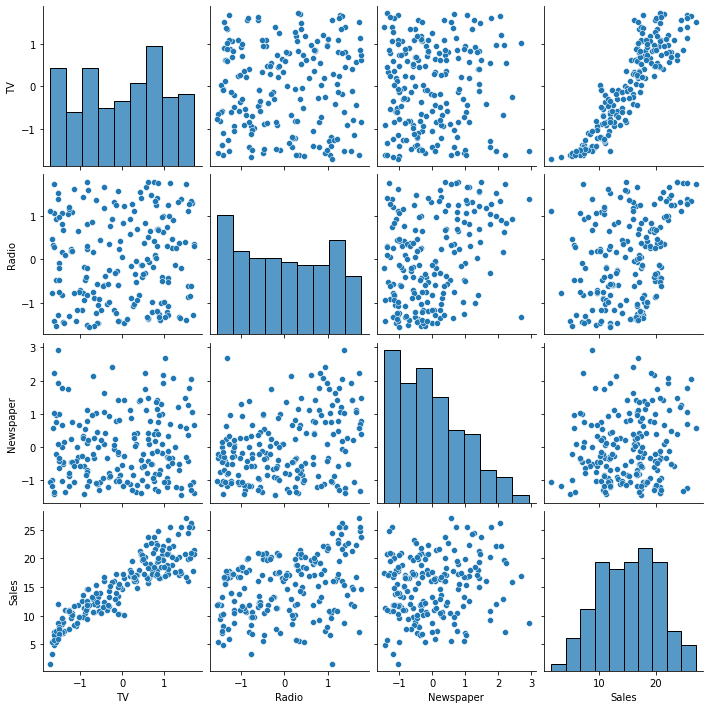

In [31]:
sns.pairplot(df)
plt.show()

Como evidenciamos en el EDA, y como vemos aqui, la unica variable que presenta una relacion lineal con las ventas es la columna TV, las demas no presentan una relacion lineal.

#### Los terminos de error deben tener varianza contanste(homocedasticidad)

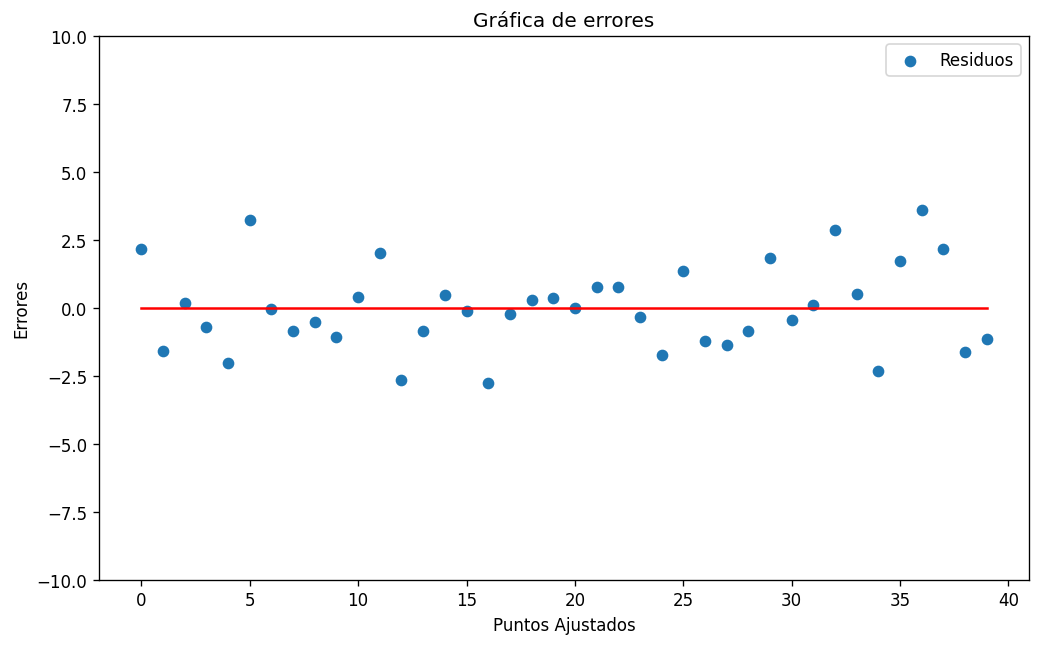

In [25]:
#Graficando Residuales
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='k')
f = range(0,40)
k = [0 for i in range(0,40)]
plt.scatter( f, residuals.residuals[:], label = 'Residuos')
plt.plot( f, k , color = 'red')
plt.xlabel('Puntos Ajustados')
plt.ylabel('Errores')
plt.title('Gráfica de errores')
plt.ylim(-10, 10)
plt.legend()

La grafica muestra que los datos tienen una varianza constante y no se evidencia comportamientos entre ellos.

### ¿Los datos se distribuyen normalmente ?

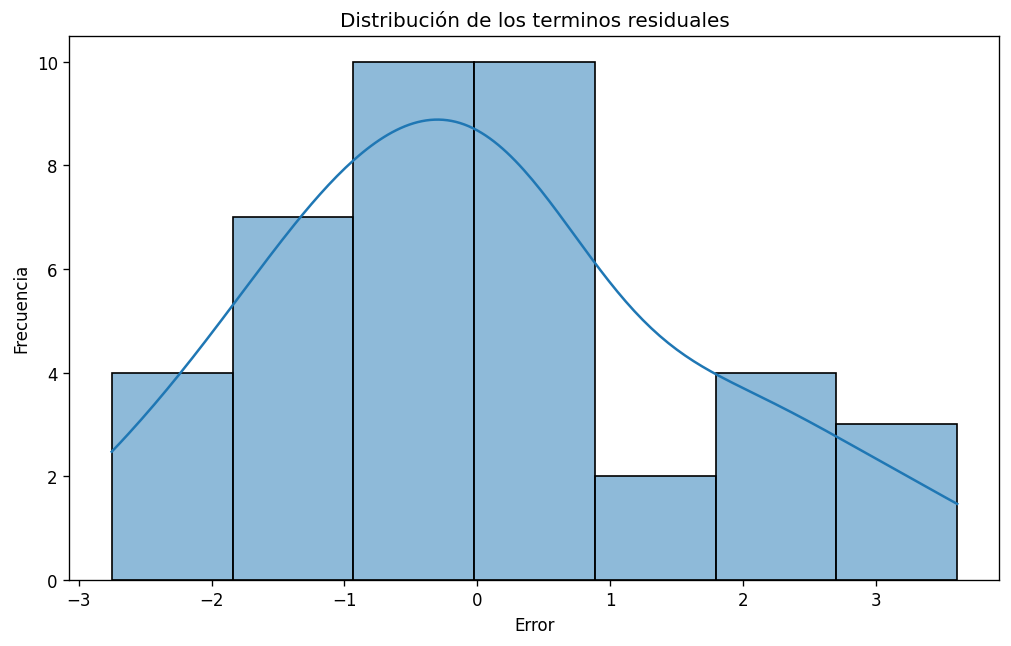

In [26]:
#Histograma para distribucion
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
sns.histplot(residuals.residuals, kde=True)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de los terminos residuales')
plt.show()

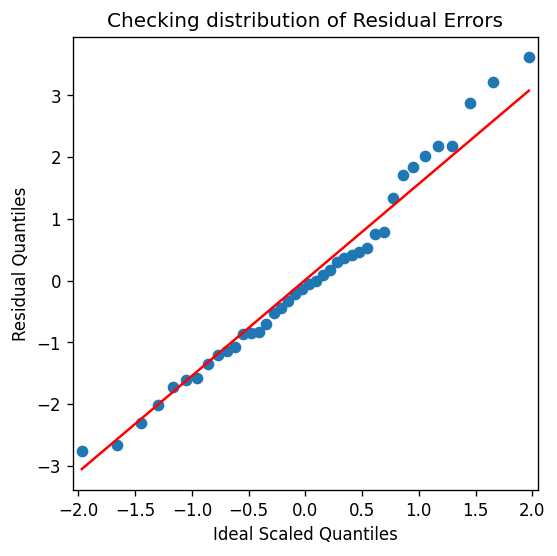

In [27]:
# Importando QQ-plot
from statsmodels.graphics.gofplots import qqplot

## Graficando QQ-Plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

El histograma y el qqplot, evidencian que los datos residuales no se comportan como una distribucion normal.

### Las variables independientes no deben estar correlacionadas

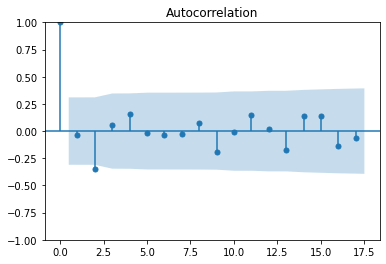

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
# residuals[residuals].iloc[0] = 0
plot_acf(residuals.residuals)
plt.show()

In [36]:
from statsmodels.stats.stattools import durbin_watson

In [37]:
durbin_watson(residuals.residuals)

2.0175547709829287

Una regla general es que los valores estadísticos de la prueba DW en el rango de 1,5 a 2,5 son relativamente normales. Sin embargo, los valores fuera de este rango podrían ser motivo de preocupación. Por lo tanto los valores son independientes y no se encuentran correlacionados.

### ¿Las variables independientes estan correlacionadas?

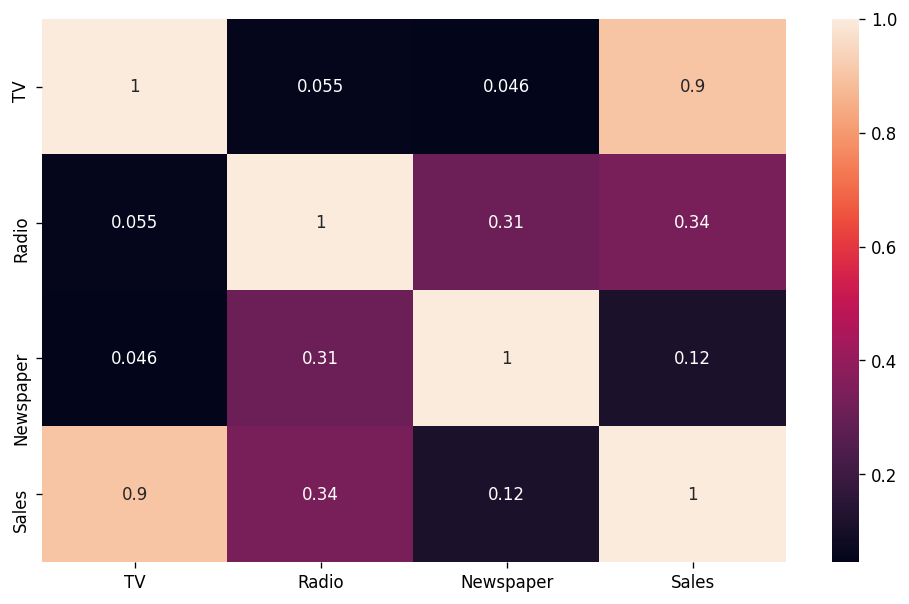

In [29]:
plt.figure(figsize=(10, 6), dpi=120)
sns.heatmap(df.corr(method='spearman'), annot = True)
plt.show()

Aunque tienen una relacion, no es evidente y esta es positivamente debil. Por lo tanto no hay relacion entre las variables dependientes.

### Conclusion de supuestos

- Linealidad : No
- Homocedasticidad : Si
- Normalidad: No
- Independencia: Si
- No Colinealidad: Si

Por lo tanto implementar regresion lineal como el mejor modelo no es convenientes... Probemos Decision tree para ver que sucede con las predicciones.

#### ¿ Se obtendran mejores resultados?

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [40]:
print(mean_absolute_error(y_true=y_test, y_pred=y_pred_dt))
print(mean_squared_error(y_true=y_test, y_pred=y_pred_dt))

1.1824999999999999
2.18975


| Algoritmo | MAE | MSE |
|-----------|-----|-----|
| Regresion Lineal | 1.23 | 2.41 | 
| Decision tree | 1.18 | 2.18 | 

La idea es obtener resultados lo mas cercanos a 0, por lo tanto Decision tree seria el mejor modelo para la prediccion de ventas, segun la inversion en los medios de comunicación. Incluso podría ser mejores resultados, probando diferentes parametros para decision tree, incluso probando otros algoritmos. 

Pero eso sera para despues.